In [21]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [22]:
unique(as.character(df$experiment))

[1] "20min STM (sucrose tube)"

[1] -0.4  0.4
[1] 0.8


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


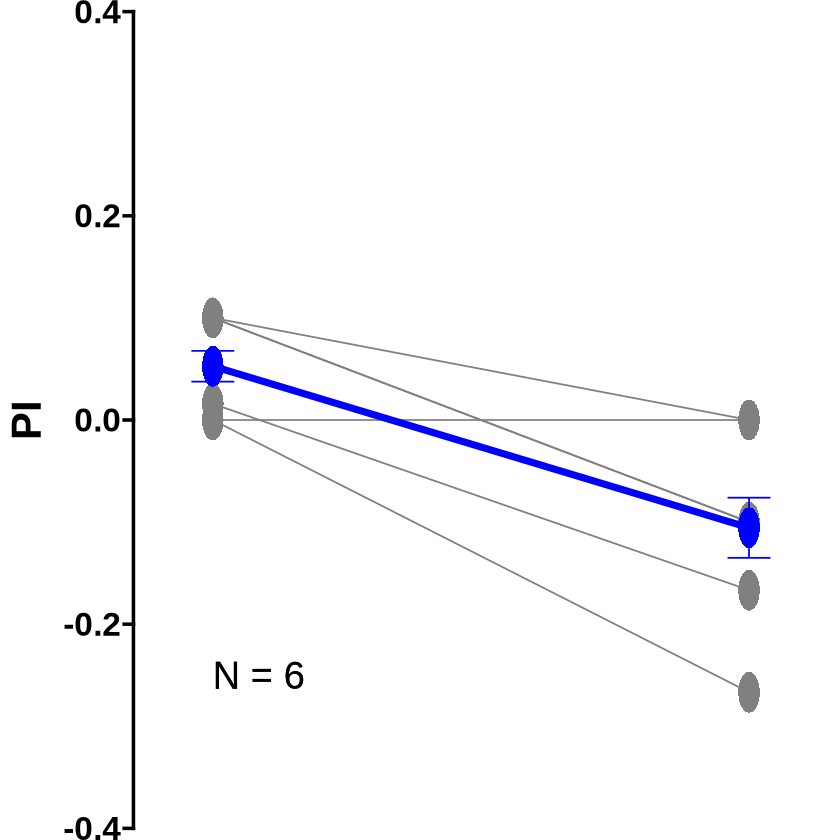

In [35]:
data <- data.table::fread(file = "tidy_data_wide.csv")
wts <- c("Cs")
experiments <- c("20min STM", "20min STM (sucrose tube)", "20min STM (all ITO)")
data <- data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
panel1_data <- data[Genotype %in% wts,]
panel1_data<-panel1_data[POST<0.1,]
panel1_data_long <- melt(panel1_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")
panel1_data_long$test <- factor(panel1_data_long$test, levels=c("PRE", "POST"))
# df <- panel1_data_long[fly_name_reference %in% panel1_data_long[test=="POST" & PI < -0.01, fly_name_reference],]
# df <- panel1_data_long#[fly_name_reference %in% panel1_data_long[test=="POST" & PI < -0.01, fly_name_reference],]
df <- panel1_data_long#[substr(fly_name_reference, 1, 10) != "2024-08-29",]
# df <- panel1_data_long[substr(fly_name_reference, 1, 19) == "2024-08-29_14-33-30",]
df <- panel1_data_long[substr(fly_name_reference, 1, 19) == "2024-08-29_15-51-50",]

panel1A <- learning_plot(
    df,
    "experiment",
    direction="horizontal",
    starsize=10, textsize=8,
    hjust_text=0,
    y_annotation=0.8,
    y_limits=c(-0.4, 0.4), y_step=0.2,
    colors=colors_panel1[1:length(unique(df$experiment))]
)
panel1A$gg

In [28]:
mean(c(1,NA), na.rm=FALSE)

[1] NA

In [36]:
x<-dcast(df, fly_name_reference ~ test, value.var="PI")
x

fly_name_reference,PRE,POST
<chr>,<dbl>,<dbl>
2024-08-29_15-51-50_AOJ_ET_ROI_1,0.00000000,-0.2666667
2024-08-29_15-51-50_AOJ_ET_ROI_12,0.10000000,0.0000000
2024-08-29_15-51-50_AOJ_ET_ROI_13,0.10000000,-0.1000000
2024-08-29_15-51-50_AOJ_ET_ROI_16,0.00000000,0.0000000
2024-08-29_15-51-50_AOJ_ET_ROI_17,0.01587302,-0.1666667
2024-08-29_15-51-50_AOJ_ET_ROI_20,0.10000000,-0.1000000


In [37]:
mean(x$POST)-mean(x$PRE)

[1] -0.1582011

In [80]:
wilcox.test(x$PRE, y=x$POST, alternative = "greater", paired = TRUE)

Warning message in wilcox.test.default(x$PRE, y = x$POST, alternative = "greater", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x$PRE, y = x$POST, alternative = "greater", :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  x$PRE and x$POST
V = 217, p-value = 0.00841
alternative hypothesis: true location shift is greater than 0


In [73]:
data[Genotype=="Cs" & POST>PRE,]

Files,sheet,fly_name_reference,ROI,Genotype,Gender,Age,interactor,comment on SD,User,⋯,POST_2_manual,PRE_machine,PRE_1_machine,PRE_2_machine,POST_machine,POST_1_machine,POST_2_machine,SD_status,interval,id
<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
2024-08-12_16-04-29_AOJ,NA,2024-08-12_16-04-29_AOJ_ROI_6,6,Cs,FEM,6,No_stimulator,NONE,AOJ,⋯,NA,-0.16666667,0.0000000,-0.3333333,0.0000000,NA,0.0000000,NONE,NONE,660
2024-08-21_14-41-00_AOJ_ET,NA,2024-08-21_14-41-00_AOJ_ET_ROI_7,7,Cs,FEM,5,No_stimulator,NONE,AOJ,⋯,NA,-0.01587302,-0.1428571,0.1111111,0.0000000,-0.1428571,0.1428571,NONE,NONE,669
2024-08-22_14-30-39_AOJ_ET,NA,2024-08-22_14-30-39_AOJ_ET_ROI_3,3,Cs,FEM,6,No_stimulator,NONE,AOJ,⋯,NA,-0.01587302,-0.1428571,0.1111111,0.0000000,0.0000000,0.0000000,NONE,NONE,679
2024-08-22_14-30-39_AOJ_ET,NA,2024-08-22_14-30-39_AOJ_ET_ROI_6,6,Cs,FEM,6,No_stimulator,NONE,AOJ,⋯,NA,-0.05555556,0.0000000,-0.1111111,0.0000000,0.0000000,0.0000000,NONE,NONE,680
2024-08-22_14-30-39_AOJ_ET,NA,2024-08-22_14-30-39_AOJ_ET_ROI_9,9,Cs,FEM,6,No_stimulator,NONE,AOJ,⋯,NA,-0.20000000,NA,-0.2000000,-0.1428571,NA,-0.1428571,NONE,NONE,682
2024-08-26_14-49-57_AOJ,NA,2024-08-26_14-49-57_AOJ_ROI_9,9,Cs,FEM,5,No_stimulator,NONE,AOJ,⋯,NA,0.16666667,0.3333333,0.0000000,0.3333333,-0.3333333,1.0000000,NONE,NONE,691
2024-08-27_15-35-18_AOJ_ET,NA,2024-08-27_15-35-18_AOJ_ET_ROI_2,2,Cs,FEM,5,No_stimulator,NONE,AOJ,⋯,NA,-0.10000000,-0.2000000,0.0000000,0.0000000,-0.1111111,0.1111111,NONE,NONE,696
2024-08-27_15-35-18_AOJ_ET,NA,2024-08-27_15-35-18_AOJ_ET_ROI_6,6,Cs,FEM,5,No_stimulator,NONE,AOJ,⋯,NA,0.02857143,0.2000000,-0.1428571,0.1000000,0.2000000,0.0000000,NONE,NONE,697


In [2]:
data <- data.table::fread(file = "tidy_data_wide.csv")
wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
experiments <- c("20min STM", "20min STM unpaired")
data <- data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
panel1_data <- data[Genotype %in% wts,]

In [3]:
A <- panel1_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel1_data[experiment=="20min STM unpaired" & Genotype %in% wts,.(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, .(delta = POST-PRE)]
Bd <- B[, .(delta = POST-PRE)]

In [4]:
data.table::fwrite(x = A, file="prism/Fig1/Figure_1_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig1/Figure_1_20min STM unpaired.csv",  quote=TRUE)
x<- Cbind(Ad, Bd)
colnames(x) <- c("20min STM", "20min STM unpaired")
data.table::fwrite(x=x, file="prism/Fig1/Figure_1_boxplot.csv",  quote=TRUE)

In [5]:
panel1_data_long <- melt(panel1_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")
panel1_data_long$test <- factor(panel1_data_long$test, levels=c("PRE", "POST"))

[1] -1.02  1.00
[1] 0.8


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2

$direction
[1] "horizontal"

$annotation
              group__ y_position annotations stars   N test          PI
1:          20min STM        0.5     < 0.001   *** 294  PRE  0.01163746
2:          20min STM        0.5     < 0.001   *** 294 POST -0.29842339
3: 20min STM unpaired        0.5      0.9992    NS 108  PRE  0.02064815
4: 20min STM unpaired        0.5      0.9992    NS 108 POST  0.13805556
   PI_median     PI_std   std_error x
1:     0.000 0.07740392 0.004514288 1
2:    -0.285 0.32989245 0.019239719 2
3:     0.000 0.07522950 0.007238962 1
4:     0.100 0.24734709 0.023800985 2


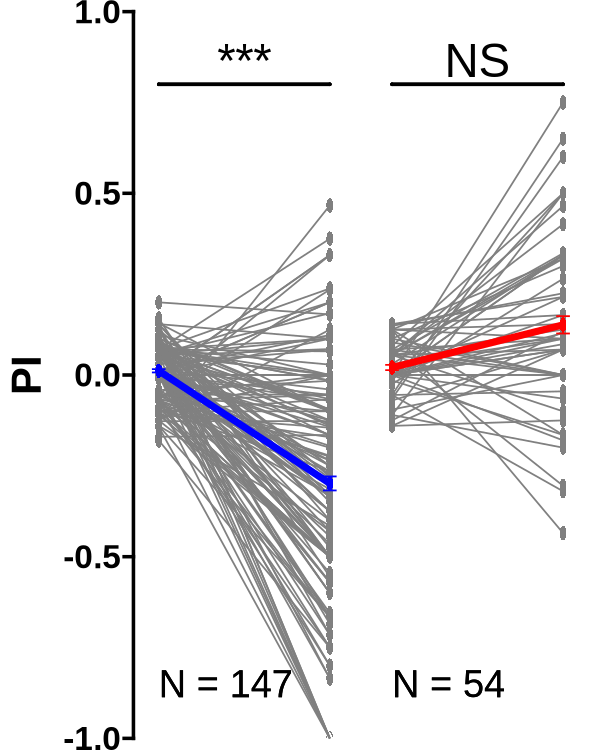

In [6]:
size_unit=2.5
ratio=2.5
panel1A <- learning_plot(
    panel1_data_long,
    "experiment",
    direction="horizontal",
    starsize=10, textsize=8,
    hjust_text=0,
    y_annotation=0.8,
    colors=colors_panel1,
    y_limits=y_limits_panel1
)
save_learning_plot(plot = panel1A, filename = "figures/panel1A.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1A$n_facets)

panel1A

In [7]:
head(panel1_data_long$test)

[1] PRE PRE PRE PRE PRE PRE
Levels: PRE POST

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
     id            group__         PRE       POST        dPI outlier
 1:   5          20min STM -0.05500000  0.3300000  0.3850000    TRUE
 2:  10          20min STM  0.14000000 -1.0000000 -1.1400000    TRUE
 3:  18          20min STM  0.00000000  0.3300000  0.3300000    TRUE
 4:  50          20min STM  0.10000000 -1.0000000 -1.1000000    TRUE
 5:  99 20min STM unpaired  0.07000000 -0.3050000 -0.3750000    TRUE
 6: 109 20min STM unpaired  0.12500000 -0.4350000 -0.5600000    TRUE
 7: 119 20min STM unpaired  0.00000000  0.7500000  0.7500000    TRUE
 8: 123 20min STM unpaired -0.05500000  0.6500000  0.7050000    TRUE
 9: 151          20min STM  0.14000000 -1.0000000 -1.1400000    TRUE
10: 154          20min STM  0.00000000  0.3300000  0.3300000    TRUE
11: 428          20min STM -0.12500000  0.4666667  0.5916667    TRUE
12: 569          20min STM  0.05555556 -1.0000000 -1.0555556    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2


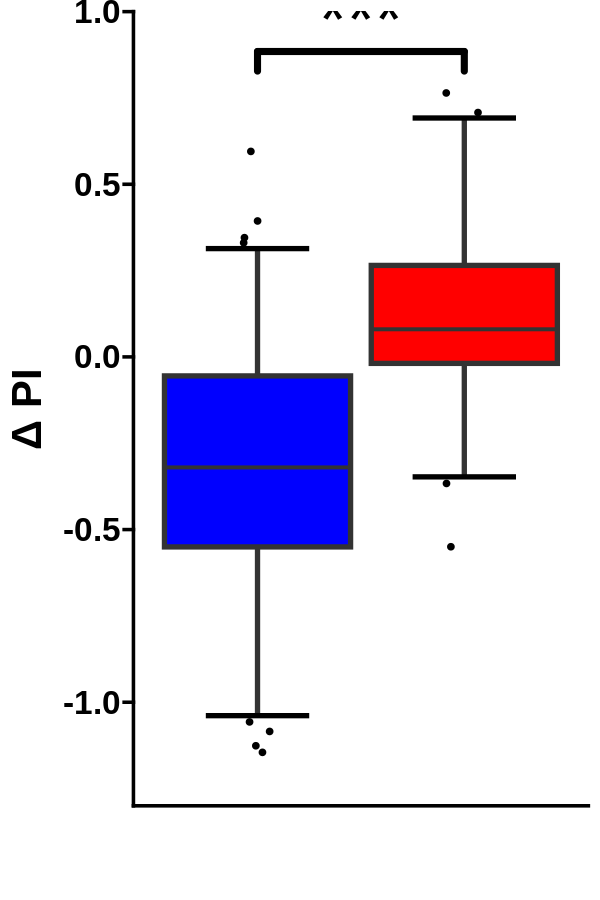

In [8]:
ratio=3
panel1B <- summary_plot(
    panel1_data_long,
    group = "experiment",
    colors=colors_panel1,
    comparisons=list(c("20min STM", "20min STM unpaired")),
    annotation_y=0.79,
    y_limits=c(-1.3, 1),
    text_y_size=20,
    title_y_size=25
)
panel1B$gg <- panel1B$gg + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) 
save_summ_plot(plot = panel1B, filename = "figures/panel1B.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1B$n_facets)
panel1B

In [9]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel1A$gg, panel1B$gg, ncol=2)
ggsave(plot = gg, filename = "figures/Figure_1.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in grid.Call(C_textBounds, as.graphi